In [ ]:
import matplotlib.pyplot as plt

# Definir los puntos
points = [(0, 0), (1, 0), (1, 1), (0, 1)]

# Separar las coordenadas X e Y
x_coords, y_coords = zip(*points)

# Crear la gráfica
plt.figure(figsize=(5,5))
plt.scatter(x_coords, y_coords, color='blue', s=100)

# Etiquetar los puntos
for i, (x, y) in enumerate(points):
    plt.text(x, y, f'P{i+1}', fontsize=12, ha='right')

# Añadir líneas entre los puntos para mostrar las conexiones
for i in range(len(points)):
    for j in range(i+1, len(points)):
        plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'k--')

# Ajustar los límites del gráfico
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

# Mostrar la gráfica
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Definir los puntos
points = [(0, 0), (1, 0), (1, 1), (0, 1)]

# Función para dibujar las bolas centradas en cada punto
def draw_balls(ax, points, radius, color='blue'):
    for (x, y) in points:
        circle = plt.Circle((x, y), radius, color=color, alpha=0.2, fill=True)
        ax.add_artist(circle)

# Función para dibujar las aristas entre puntos conectados
def draw_edges(ax, points, threshold):
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            # Calcular la distancia entre los puntos
            dist = np.linalg.norm(np.array(points[i]) - np.array(points[j]))
            if dist <= threshold:
                ax.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'k-')

# Función para dibujar los puntos
def draw_points(ax, points):
    x_coords, y_coords = zip(*points)
    ax.scatter(x_coords, y_coords, color='blue', s=100)
    for i, (x, y) in enumerate(points):
        ax.text(x, y, f'P{i+1}', fontsize=12, ha='right')

# Crear la primera gráfica: Bolas con radio < 0.5
fig, ax = plt.subplots(figsize=(5, 5))
draw_points(ax, points)
draw_balls(ax, points, radius=0.4, color='blue')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
ax.set_aspect('equal', adjustable='box')
plt.title("Bolas con radio < 0.5 (sin conexiones)")
plt.show()

# Crear la segunda gráfica: Aristas con radio > 0.5 y < 1
fig, ax = plt.subplots(figsize=(5, 5))
draw_points(ax, points)
draw_balls(ax, points, radius=0.8, color='red')  # Cambia el radio para que se superpongan las bolas
draw_edges(ax, points, threshold=1.0)  # Dibujar aristas cuando la distancia es <= 1.0
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
ax.set_aspect('equal', adjustable='box')
plt.title("Bolas con radio > 0.5 y conexiones (aristas)")
plt.show()


In [ ]:
import gudhi as gd
import matplotlib.pyplot as plt

# Definir los puntos
#points = [(0, 0), (1, 0), (1, 1), (0, 1)]
points= [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]
# Crear el complejo de Rips a partir de los puntos
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Crear el complejo simplicial filtrado
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular la homología persistente
diag = simplex_tree.persistence()

# Mostrar el diagrama de persistencia
gd.plot_persistence_diagram(diag,legend=True)
plt.title("Diagrama de Persistencia asd")
plt.show()

# También podemos mostrar el código de barras de la persistencia
gd.plot_persistence_barcode(diag)
plt.title("Código de Barras de Persistencia")
plt.show()


In [ ]:

# Separar las coordenadas X e Y
x_coords, y_coords = zip(*points)

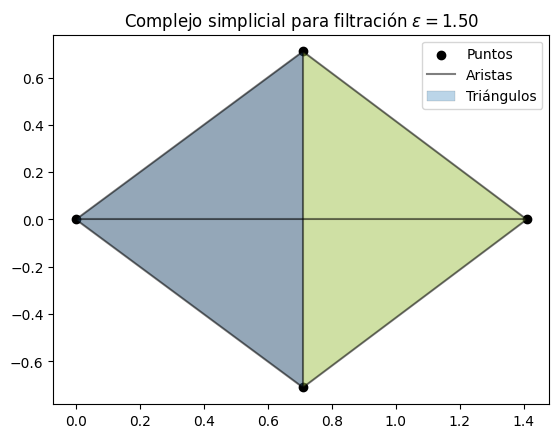

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd  # Usar el nombre correcto del módulo

# Definir los puntos
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Crear el complejo de Rips a partir de los puntos
rips_complex = gd.RipsComplex(points=points, max_edge_length=3.0)

# Crear el complejo simplicial filtrado
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular la homología persistente
diag = simplex_tree.persistence()

# Separar las coordenadas X e Y
x_coords, y_coords = zip(*points)

# Definir el valor de filtración (epsilon)
eps =1.5  # Cambia este valor según la filtración que quieras visualizar

# Obtener 0-símplices (puntos), 1-símplices (aristas) y 2-símplices (triángulos)
# Puntos
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= eps]

# Aristas
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= eps]

# Triángulos
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= eps]

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los puntos
ax.scatter(x_coords, y_coords, c='black', marker='o', label='Puntos')

# Graficar las aristas (1-símplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax.plot(x_edge, y_edge, 'k-', alpha=0.5, label='Aristas' if edge == edges[0] else "")

# Graficar los triángulos (2-símplices)
if triangles:
    # Convertir los triángulos a índices de enteros
    triangles = np.array(triangles)
    
    # Crear una triangulación para la función plt.tripcolor()
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    
    # Definir un mapa de colores basado en el valor de las coordenadas x
    cmap = plt.get_cmap('viridis')
    
    # Valores de color basados en las coordenadas x
    color_values = np.array(x_coords)
    
    # Colorear los triángulos
    collec = ax.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label='Triángulos')

# Añadir una leyenda para distinguir puntos, aristas y triángulos
ax.legend()

# Añadir título que indique el valor de filtración
plt.title(f"Complejo simplicial para filtración $\\epsilon={eps:.2f}$")

# Mostrar la gráfica
plt.show()


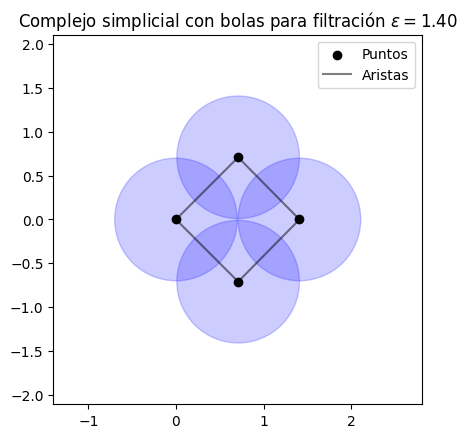

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd  # Usar el nombre correcto del módulo

# Definir los puntos
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Crear el complejo de Rips a partir de los puntos
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Crear el complejo simplicial filtrado
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular la homología persistente
diag = simplex_tree.persistence()

# Separar las coordenadas X e Y
x_coords, y_coords = zip(*points)

# Definir el valor de filtración (epsilon)
eps = 1.4  # Cambia este valor según la filtración que quieras visualizar
radio = eps / 2  # Radio de las bolas alrededor de los puntos

# Obtener 0-símplices (puntos), 1-símplices (aristas) y 2-símplices (triángulos)
# Puntos
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= eps]

# Aristas
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= eps]

# Triángulos
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= eps]

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los círculos (bolas) alrededor de cada punto
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radio, color='b', alpha=0.2)
    ax.add_patch(circle)

# Graficar los puntos
ax.scatter(x_coords, y_coords, c='black', marker='o', label='Puntos')

# Graficar las aristas (1-símplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax.plot(x_edge, y_edge, 'k-', alpha=0.5, label='Aristas' if edge == edges[0] else "")

# Graficar los triángulos (2-símplices)
if triangles:
    # Convertir los triángulos a índices de enteros
    triangles = np.array(triangles)
    
    # Crear una triangulación para la función plt.tripcolor()
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    
    # Definir un mapa de colores basado en el valor de las coordenadas x
    cmap = plt.get_cmap('viridis')
    
    # Valores de color basados en las coordenadas x
    color_values = np.array(x_coords)
    
    # Colorear los triángulos
    collec = ax.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label='Triángulos')

# Añadir una leyenda para distinguir puntos, aristas y triángulos
ax.legend()

# Añadir título que indique el valor de filtración
plt.title(f"Complejo simplicial con bolas para filtración $\\epsilon={eps:.2f}$")

# Ajustar los límites de la gráfica para mostrar las bolas completas
ax.set_xlim(min(x_coords) - eps, max(x_coords) + eps)
ax.set_ylim(min(y_coords) - eps, max(y_coords) + eps)

# Mostrar la gráfica
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


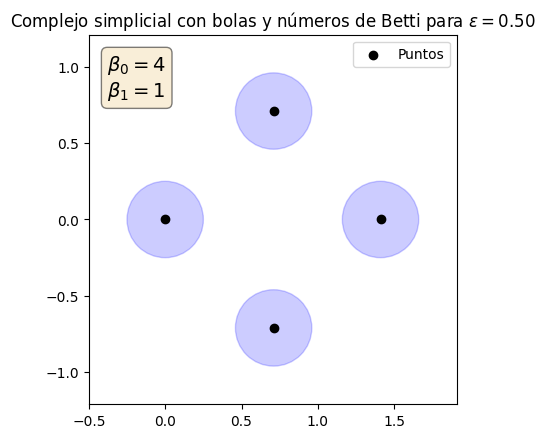

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd  # Usar el nombre correcto del módulo

# Definir los puntos
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Crear el complejo de Rips a partir de los puntos
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Crear el complejo simplicial filtrado
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular la homología persistente
diag = simplex_tree.persistence()

# Separar las coordenadas X e Y
x_coords, y_coords = zip(*points)

# Definir el valor de filtración (epsilon)
eps = 0.5  # Cambia este valor según la filtración que quieras visualizar
radio = eps / 2  # Radio de las bolas alrededor de los puntos

# Obtener 0-símplices (puntos), 1-símplices (aristas) y 2-símplices (triángulos)
# Puntos
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= eps]

# Aristas
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= eps]

# Triángulos
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= eps]

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los círculos (bolas) alrededor de cada punto
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radio, color='b', alpha=0.2)
    ax.add_patch(circle)

# Graficar los puntos
ax.scatter(x_coords, y_coords, c='black', marker='o', label='Puntos')

# Graficar las aristas (1-símplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax.plot(x_edge, y_edge, 'k-', alpha=0.5, label='Aristas' if edge == edges[0] else "")

# Graficar los triángulos (2-símplices)
if triangles:
    # Convertir los triángulos a índices de enteros
    triangles = np.array(triangles)
    
    # Crear una triangulación para la función plt.tripcolor()
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    
    # Definir un mapa de colores basado en el valor de las coordenadas x
    cmap = plt.get_cmap('viridis')
    
    # Valores de color basados en las coordenadas x
    color_values = np.array(x_coords)
    
    # Colorear los triángulos
    collec = ax.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label='Triángulos')

# Calcular los números de Betti
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][1] > eps)  # Número de componentes conexas
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][1] > eps)  # Número de 1-ciclos o agujeros

# Mostrar los números de Betti en la gráfica
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Añadir una leyenda para distinguir puntos, aristas y triángulos
ax.legend()

# Añadir título que indique el valor de filtración
plt.title(f"Complejo simplicial con bolas y números de Betti para $\\epsilon={eps:.2f}$")

# Ajustar los límites de la gráfica para mostrar las bolas completas
ax.set_xlim(min(x_coords) - eps, max(x_coords) + eps)
ax.set_ylim(min(y_coords) - eps, max(y_coords) + eps)

# Mostrar la gráfica
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


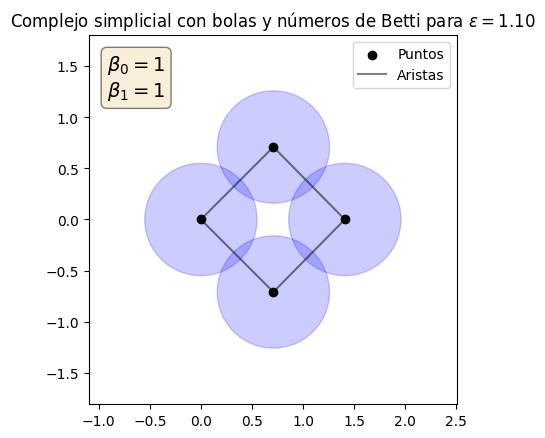

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd  # Usar el nombre correcto del módulo

# Definir los puntos
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Crear el complejo de Rips a partir de los puntos
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Crear el complejo simplicial filtrado
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular la homología persistente
diag = simplex_tree.persistence()

# Separar las coordenadas X e Y
x_coords, y_coords = zip(*points)

# Definir el valor de filtración (epsilon)
eps = 1.1  # Cambia este valor según la filtración que quieras visualizar
radio = eps / 2  # Radio de las bolas alrededor de los puntos

# Obtener 0-símplices (puntos), 1-símplices (aristas) y 2-símplices (triángulos)
# Puntos
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= eps]

# Aristas
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= eps]

# Triángulos
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= eps]

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los círculos (bolas) alrededor de cada punto
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radio, color='b', alpha=0.2)
    ax.add_patch(circle)

# Graficar los puntos
ax.scatter(x_coords, y_coords, c='black', marker='o', label='Puntos')

# Graficar las aristas (1-símplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax.plot(x_edge, y_edge, 'k-', alpha=0.5, label='Aristas' if edge == edges[0] else "")

# Graficar los triángulos (2-símplices)
if triangles:
    # Convertir los triángulos a índices de enteros
    triangles = np.array(triangles)
    
    # Crear una triangulación para la función plt.tripcolor()
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    
    # Definir un mapa de colores basado en el valor de las coordenadas x
    cmap = plt.get_cmap('viridis')
    
    # Valores de color basados en las coordenadas x
    color_values = np.array(x_coords)
    
    # Colorear los triángulos
    collec = ax.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label='Triángulos')

# Calcular los números de Betti solo para la filtración en eps
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= eps and (i[1][1] > eps or i[1][1] == float('inf')))  # Número de componentes conexas
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= eps and (i[1][1] > eps or i[1][1] == float('inf')))  # Número de 1-ciclos o agujeros

# Mostrar los números de Betti en la gráfica
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Añadir una leyenda para distinguir puntos, aristas y triángulos
ax.legend()

# Añadir título que indique el valor de filtración
plt.title(f"Complejo simplicial con bolas y números de Betti para $\\epsilon={eps:.2f}$")

# Ajustar los límites de la gráfica para mostrar las bolas completas
ax.set_xlim(min(x_coords) - eps, max(x_coords) + eps)
ax.set_ylim(min(y_coords) - eps, max(y_coords) + eps)

# Mostrar la gráfica
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


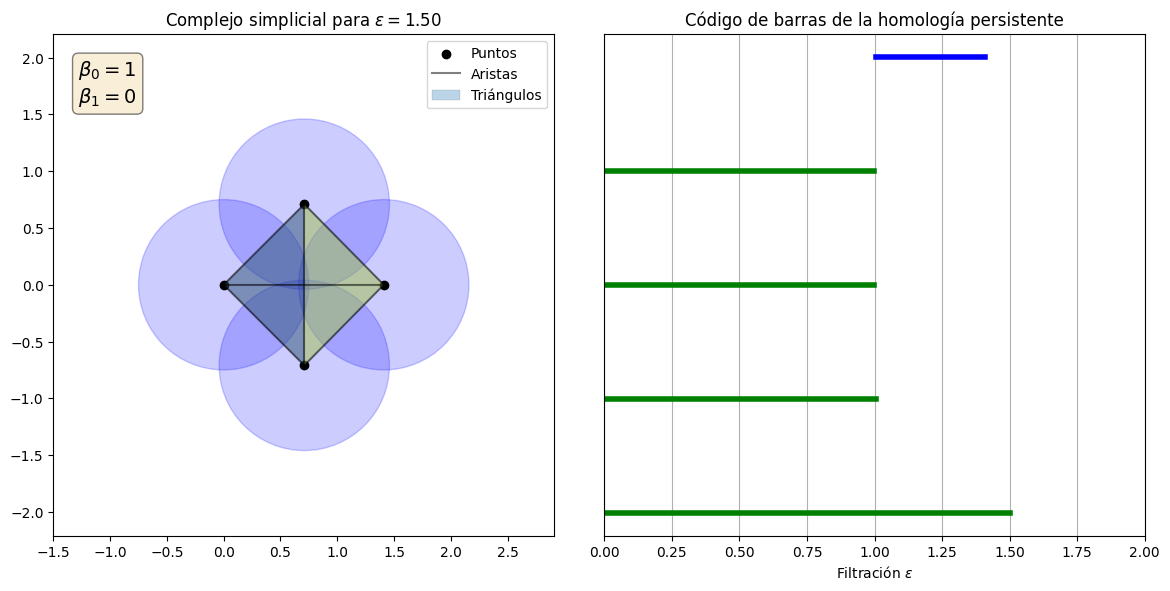

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd

# Definir los puntos
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Crear el complejo de Rips a partir de los puntos
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Crear el complejo simplicial filtrado
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular la homología persistente
diag = simplex_tree.persistence()

# Separar las coordenadas X e Y
x_coords, y_coords = zip(*points)

# Definir el valor de filtración (epsilon)
eps = 1.5 # Cambia este valor según la filtración que quieras visualizar
radio = eps / 2  # Radio de las bolas alrededor de los puntos

# Obtener 0-símplices (puntos), 1-símplices (aristas) y 2-símplices (triángulos)
# Puntos
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= eps]

# Aristas
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= eps]

# Triángulos
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= eps]

# Crear figura con dos subgráficas: una para el complejo simplicial y otra para el código de barras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Graficar los círculos (bolas) alrededor de cada punto
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radio, color='b', alpha=0.2)
    ax1.add_patch(circle)

# Graficar los puntos
ax1.scatter(x_coords, y_coords, c='black', marker='o', label='Puntos')

# Graficar las aristas (1-símplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label='Aristas' if edge == edges[0] else "")

# Graficar los triángulos (2-símplices)
if triangles:
    triangles = np.array(triangles)
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    cmap = plt.get_cmap('viridis')
    color_values = np.array(x_coords)
    collec = ax1.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label='Triángulos')

# Calcular los números de Betti solo para la filtración en eps
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= eps and (i[1][1] > eps or i[1][1] == float('inf')))
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= eps and (i[1][1] > eps or i[1][1] == float('inf')))

# Mostrar los números de Betti en la gráfica
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Añadir leyenda
ax1.legend()

# Título del complejo simplicial
ax1.set_title(f"Complejo simplicial para $\\epsilon={eps:.2f}$")

# Ajustar límites de la gráfica para mostrar las bolas completas
ax1.set_xlim(min(x_coords) - eps, max(x_coords) + eps)
ax1.set_ylim(min(y_coords) - eps, max(y_coords) + eps)
ax1.set_aspect('equal', adjustable='box')

# Segunda subgráfica: Código de barras para los números de Betti

# Filtrar solo las barras que tienen que ver con la filtración actual
bars_betti_0 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else eps) for i in diag if i[0] == 0 and i[1][0] <= eps]
bars_betti_1 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else eps) for i in diag if i[0] == 1 and i[1][0] <= eps]

# Graficar las barras verdes para Betti 0
for i, (birth, death) in enumerate(bars_betti_0):
    ax2.plot([birth, death], [i, i], color='green', lw=4)

# Graficar las barras azules para Betti 1
offset = len(bars_betti_0)
for i, (birth, death) in enumerate(bars_betti_1):
    ax2.plot([birth, death], [i + offset, i + offset], color='blue', lw=4)

# Añadir título y etiquetas al gráfico de barras
ax2.set_title("Código de barras de la homología persistente")
ax2.set_xlabel("Filtración $\epsilon$")
ax2.set_yticks([])
ax2.set_xlim(0, 2)  # Ajustar los límites del eje x según el máximo valor de filtración
ax2.grid(True)

# Mostrar las dos gráficas juntas
plt.tight_layout()
plt.show()


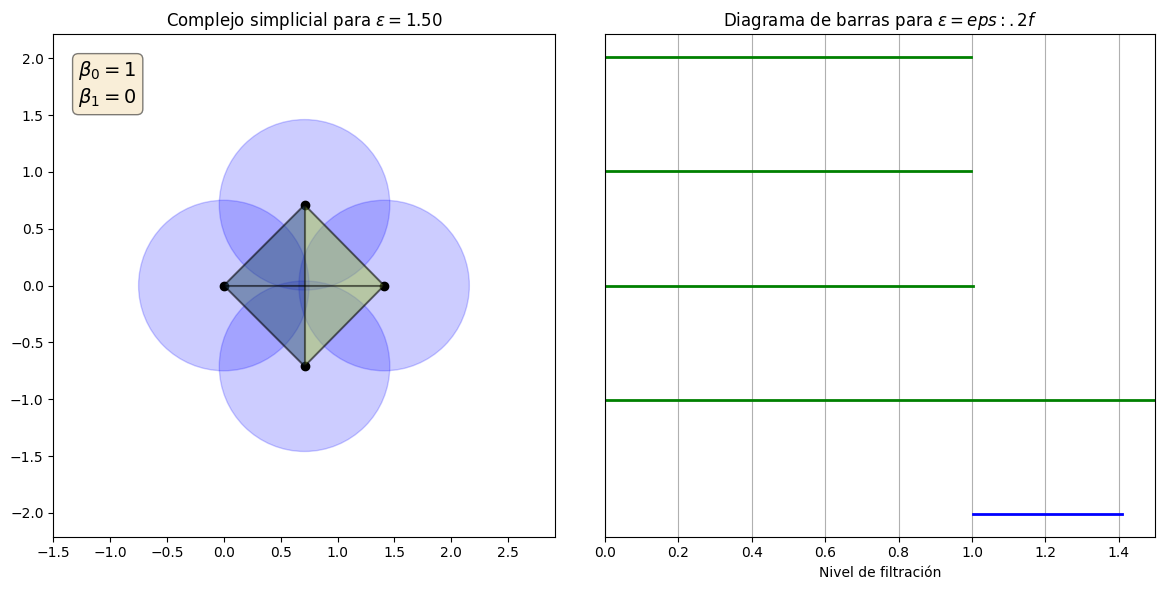

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd  # Usar el nombre correcto del módulo

# Definir los puntos
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Crear el complejo de Rips a partir de los puntos
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Crear el complejo simplicial filtrado
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular la homología persistente
diag = simplex_tree.persistence()

# Separar las coordenadas X e Y
x_coords, y_coords = zip(*points)

# Definir el valor de filtración (epsilon)
eps = 1.5  # Cambia este valor según la filtración que quieras visualizar
radio = eps / 2  # Radio de las bolas alrededor de los puntos

# Obtener 0-símplices (puntos), 1-símplices (aristas) y 2-símplices (triángulos)
# Puntos
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= eps]

# Aristas
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= eps]

# Triángulos
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= eps]

# Crear una figura y ejes para dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico del complejo simplicial
ax1 = axes[0]
ax1.set_title(f"Complejo simplicial para $\\epsilon={eps:.2f}$")

# Graficar los círculos (bolas) alrededor de cada punto
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radio, color='b', alpha=0.2)
    ax1.add_patch(circle)

# Graficar los puntos
ax1.scatter(x_coords, y_coords, c='black', marker='o', label='Puntos')

# Graficar las aristas (1-símplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label='Aristas' if edge == edges[0] else "")

# Graficar los triángulos (2-símplices)
if triangles:
    triangles = np.array(triangles)
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    color_values = np.array(x_coords)
    collec = ax1.tripcolor(triang, color_values, cmap='viridis', edgecolors='k', alpha=0.3, label='Triángulos')

# Calcular los números de Betti para la filtración en eps
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= eps and (i[1][1] > eps or i[1][1] == float('inf')))
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= eps and (i[1][1] > eps or i[1][1] == float('inf')))

# Mostrar los números de Betti en la gráfica
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14, verticalalignment='top', bbox=props)

# Ajustar los límites de la gráfica
ax1.set_xlim(min(x_coords) - eps, max(x_coords) + eps)
ax1.set_ylim(min(y_coords) - eps, max(y_coords) + eps)
ax1.set_aspect('equal', adjustable='box')

# Gráfico del diagrama de código de barras
ax2 = axes[1]
ax2.set_title("Diagrama de barras para $\\epsilon={eps:.2f}$")

# Filtrar y graficar solo las barras relevantes a eps
for i, (dim, (birth, death)) in enumerate(diag):
    if death > eps or death == float('inf'):
        death = eps
    if dim == 0:
        ax2.plot([birth, death], [i, i], 'g-', lw=2)  # Barras verdes para componentes conexas (Betti 0)
    elif dim == 1:
        ax2.plot([birth, death], [i, i], 'b-', lw=2)  # Barras azules para 1-hoyos (Betti 1)

ax2.set_xlabel("Nivel de filtración")
ax2.set_yticks([])  # Ocultar las etiquetas del eje y para simplicidad
ax2.set_xlim(0, eps)
ax2.grid(True)

# Mostrar ambas gráficas
plt.tight_layout()
plt.show()


In [3]:
vertices, edges, triangles

([[0], [1], [2], [3]],
 [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]],
 array([[0, 1, 2],
        [0, 1, 3],
        [0, 2, 3],
        [1, 2, 3]]))

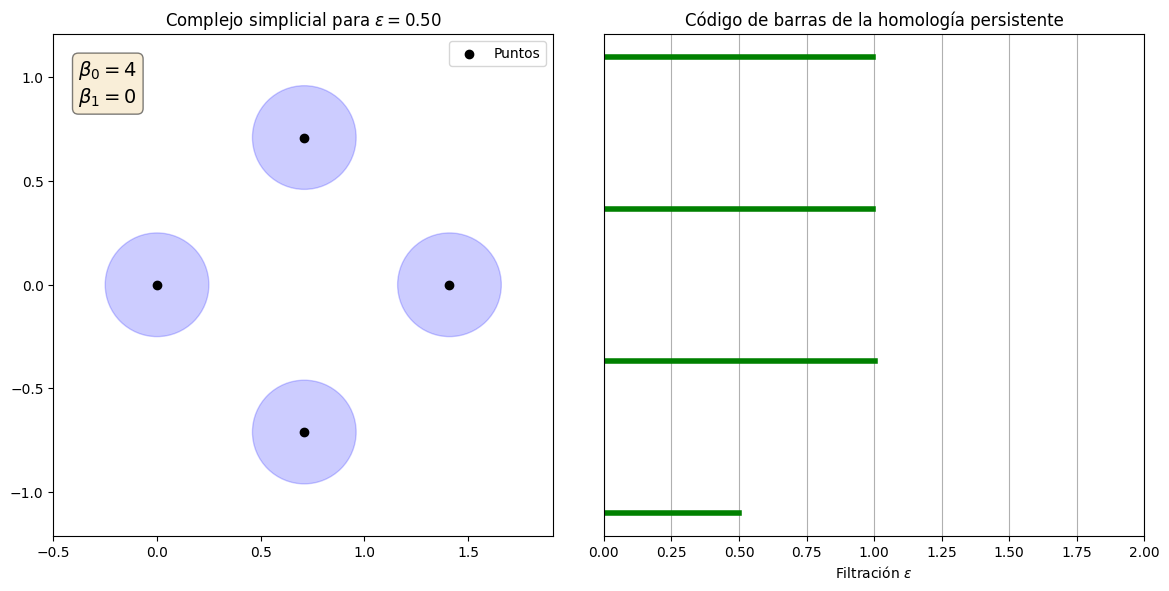

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd

# Definir los puntos
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Crear el complejo de Rips a partir de los puntos
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Crear el complejo simplicial filtrado
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular la homología persistente
diag = simplex_tree.persistence()

# Separar las coordenadas X e Y
x_coords, y_coords = zip(*points)

# Definir el valor de filtración (epsilon)
eps = 0.5  # Cambia este valor según la filtración que quieras visualizar
radio = eps / 2  # Radio de las bolas alrededor de los puntos

# Obtener 0-símplices (puntos), 1-símplices (aristas) y 2-símplices (triángulos)
# Puntos
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= eps]

# Aristas
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= eps]

# Triángulos
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= eps]

# Crear figura con dos subgráficas: una para el complejo simplicial y otra para el código de barras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Graficar los círculos (bolas) alrededor de cada punto
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radio, color='b', alpha=0.2)
    ax1.add_patch(circle)

# Graficar los puntos
ax1.scatter(x_coords, y_coords, c='black', marker='o', label='Puntos')

# Graficar las aristas (1-símplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label='Aristas' if edge == edges[0] else "")

# Graficar los triángulos (2-símplices)
if triangles:
    triangles = np.array(triangles)
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    cmap = plt.get_cmap('viridis')
    color_values = np.array(x_coords)
    collec = ax1.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label='Triángulos')

# Calcular los números de Betti solo para la filtración en eps
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= eps and (i[1][1] > eps or i[1][1] == float('inf')))
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= eps and (i[1][1] > eps or i[1][1] == float('inf')))

# Mostrar los números de Betti en la gráfica
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Añadir leyenda
ax1.legend()

# Título del complejo simplicial
ax1.set_title(f"Complejo simplicial para $\\epsilon={eps:.2f}$")

# Ajustar límites de la gráfica para mostrar las bolas completas
ax1.set_xlim(min(x_coords) - eps, max(x_coords) + eps)
ax1.set_ylim(min(y_coords) - eps, max(y_coords) + eps)
ax1.set_aspect('equal', adjustable='box')

# Segunda subgráfica: Código de barras para los números de Betti

# Filtrar solo las barras que tienen que ver con la filtración actual
bars_betti_0 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else eps) for i in diag if i[0] == 0 and i[1][0] <= eps]
bars_betti_1 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else eps) for i in diag if i[0] == 1 and i[1][0] <= eps]

# Graficar las barras verdes para Betti 0
for i, (birth, death) in enumerate(bars_betti_0):
    ax2.plot([birth, death], [i, i], color='green', lw=4)

# Graficar las barras azules para Betti 1
offset = len(bars_betti_0)
for i, (birth, death) in enumerate(bars_betti_1):
    ax2.plot([birth, death], [i + offset, i + offset], color='blue', lw=4)

# Añadir título y etiquetas al gráfico de barras
ax2.set_title("Código de barras de la homología persistente")
ax2.set_xlabel("Filtración $\epsilon$")
ax2.set_yticks([])
ax2.set_xlim(0, 2)  # Ajustar los límites del eje x según el máximo valor de filtración
ax2.grid(True)

# Mostrar las dos gráficas juntas
plt.tight_layout()
plt.show()



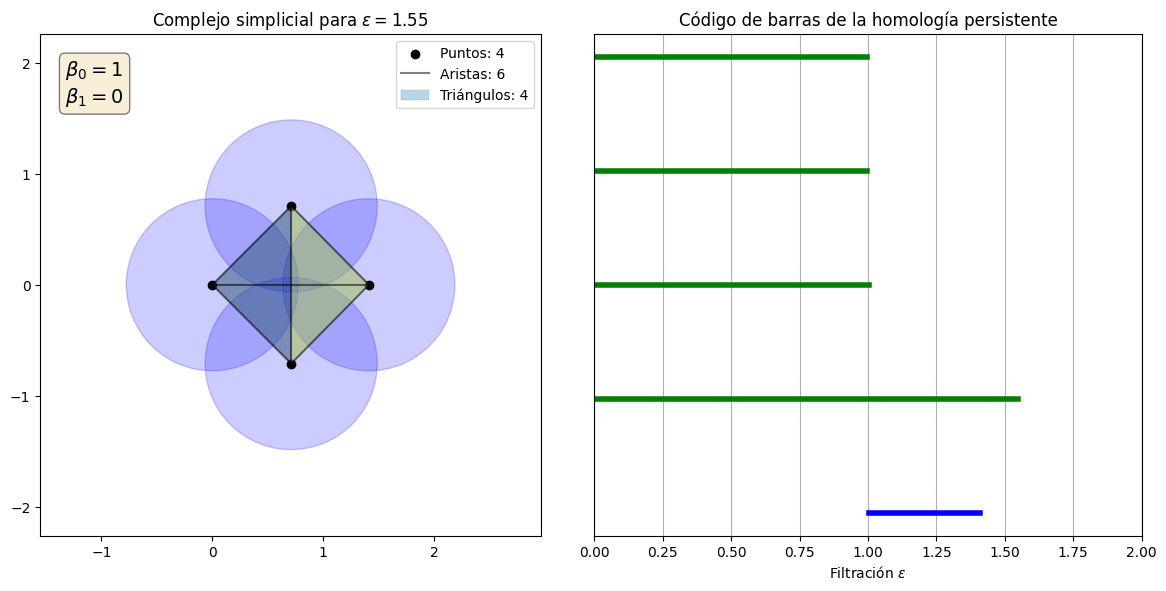

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd

# Definir los puntos
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Crear el complejo de Rips a partir de los puntos
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Crear el complejo simplicial filtrado
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular la homología persistente
diag = simplex_tree.persistence()

# Separar las coordenadas X e Y
x_coords, y_coords = zip(*points)

# Definir el valor de filtración (epsilon)
eps = 1.55  # Cambia este valor según la filtración que quieras visualizar
radio = eps / 2  # Radio de las bolas alrededor de los puntos

# Obtener 0-símplices (puntos), 1-símplices (aristas) y 2-símplices (triángulos)
# Puntos
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= eps]

# Aristas
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= eps]

# Triángulos
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= eps]

# Crear figura con dos subgráficas: una para el complejo simplicial y otra para el código de barras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Graficar los círculos (bolas) alrededor de cada punto
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radio, color='b', alpha=0.2)
    ax1.add_patch(circle)

# Graficar los puntos
ax1.scatter(x_coords, y_coords, c='black', marker='o', label=f'Puntos: {len(vertices)}')

# Graficar las aristas (1-símplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label=f'Aristas: {len(edges)}' if edge == edges[0] else "")

# Graficar los triángulos (2-símplices)
if triangles:
    triangles = np.array(triangles)
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    cmap = plt.get_cmap('viridis')
    color_values = np.array(x_coords)
    collec = ax1.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label=f'Triángulos: {len(triangles)}')

# Calcular los números de Betti solo para la filtración en eps
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= eps and (i[1][1] > eps or i[1][1] == float('inf')))
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= eps and (i[1][1] > eps or i[1][1] == float('inf')))

# Mostrar los números de Betti en la gráfica
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
         verticalalignment='top', bbox=props)

# Añadir leyenda con número de puntos, aristas y triángulos
ax1.legend()

# Título del complejo simplicial
ax1.set_title(f"Complejo simplicial para $\\epsilon={eps:.2f}$")

# Ajustar límites de la gráfica para mostrar las bolas completas
ax1.set_xlim(min(x_coords) - eps, max(x_coords) + eps)
ax1.set_ylim(min(y_coords) - eps, max(y_coords) + eps)
ax1.set_aspect('equal', adjustable='box')

# Segunda subgráfica: Código de barras para los números de Betti

# Filtrar solo las barras que tienen que ver con la filtración actual
bars_betti_0 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else eps) for i in diag if i[0] == 0 and i[1][0] <= eps]
bars_betti_1 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else eps) for i in diag if i[0] == 1 and i[1][0] <= eps]

# Graficar las barras azules para Betti 1 (1-hoyos), debajo
for i, (birth, death) in enumerate(bars_betti_1):
    ax2.plot([birth, death], [i, i], color='blue', lw=4)

# Graficar las barras verdes para Betti 0 (componentes conexas), arriba
offset = len(bars_betti_1)
for i, (birth, death) in enumerate(bars_betti_0):
    ax2.plot([birth, death], [i + offset, i + offset], color='green', lw=4)

# Añadir título y etiquetas al gráfico de barras
ax2.set_title("Código de barras de la homología persistente")
ax2.set_xlabel("Filtración $\epsilon$")
ax2.set_yticks([])
ax2.set_xlim(0, 2)  # Ajustar los límites del eje x según el máximo valor de filtración
ax2.grid(True)

# Mostrar las dos gráficas juntas
plt.tight_layout()
plt.show()


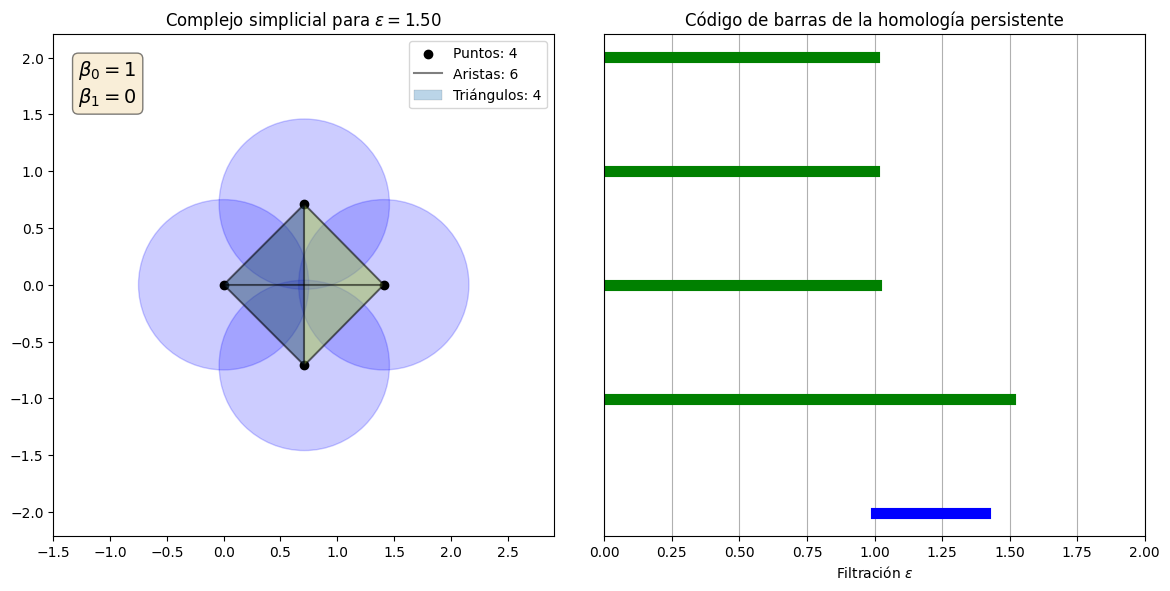

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd

# Definir los puntos
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Crear el complejo de Rips a partir de los puntos
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Crear el complejo simplicial filtrado
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular la homología persistente
diag = simplex_tree.persistence()

# Separar las coordenadas X e Y
x_coords, y_coords = zip(*points)

# Definir el valor de filtración (epsilon)
eps = 1.5  # Cambia este valor según la filtración que quieras visualizar
radio = eps / 2  # Radio de las bolas alrededor de los puntos

# Obtener 0-símplices (puntos), 1-símplices (aristas) y 2-símplices (triángulos)
# Puntos
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= eps]

# Aristas
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= eps]

# Triángulos
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= eps]

# Crear figura con dos subgráficas: una para el complejo simplicial y otra para el código de barras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Graficar los círculos (bolas) alrededor de cada punto
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radio, color='b', alpha=0.2)
    ax1.add_patch(circle)

# Graficar los puntos
ax1.scatter(x_coords, y_coords, c='black', marker='o', label=f'Puntos: {len(vertices)}')

# Graficar las aristas (1-símplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label=f'Aristas: {len(edges)}' if edge == edges[0] else "")

# Graficar los triángulos (2-símplices)
if triangles:
    triangles = np.array(triangles)
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    cmap = plt.get_cmap('viridis')
    color_values = np.array(x_coords)
    collec = ax1.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label=f'Triángulos: {len(triangles)}')

# Calcular los números de Betti solo para la filtración en eps
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= eps and (i[1][1] > eps or i[1][1] == float('inf')))
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= eps and (i[1][1] > eps or i[1][1] == float('inf')))

# Mostrar los números de Betti en la gráfica
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
         verticalalignment='top', bbox=props)

# Añadir leyenda con número de puntos, aristas y triángulos
ax1.legend()

# Título del complejo simplicial
ax1.set_title(f"Complejo simplicial para $\\epsilon={eps:.2f}$")

# Ajustar límites de la gráfica para mostrar las bolas completas
ax1.set_xlim(min(x_coords) - eps, max(x_coords) + eps)
ax1.set_ylim(min(y_coords) - eps, max(y_coords) + eps)
ax1.set_aspect('equal', adjustable='box')

# Segunda subgráfica: Código de barras para los números de Betti

# Filtrar solo las barras que tienen que ver con la filtración actual
bars_betti_0 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else eps) for i in diag if i[0] == 0 and i[1][0] <= eps]
bars_betti_1 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else eps) for i in diag if i[0] == 1 and i[1][0] <= eps]

# Graficar las barras azules para Betti 1 (1-hoyos), debajo, con mayor grosor
for i, (birth, death) in enumerate(bars_betti_1):
    ax2.plot([birth, death], [i, i], color='blue', lw=8)  # Grosor de línea aumentado

# Graficar las barras verdes para Betti 0 (componentes conexas), arriba, con mayor grosor
offset = len(bars_betti_1)
for i, (birth, death) in enumerate(bars_betti_0):
    ax2.plot([birth, death], [i + offset, i + offset], color='green', lw=8)  # Grosor de línea aumentado

# Añadir título y etiquetas al gráfico de barras
ax2.set_title("Código de barras de la homología persistente")
ax2.set_xlabel("Filtración $\epsilon$")
ax2.set_yticks([])
ax2.set_xlim(0, 2)  # Ajustar los límites del eje x según el máximo valor de filtración
ax2.grid(True)

# Mostrar las dos gráficas juntas
plt.tight_layout()
plt.show()


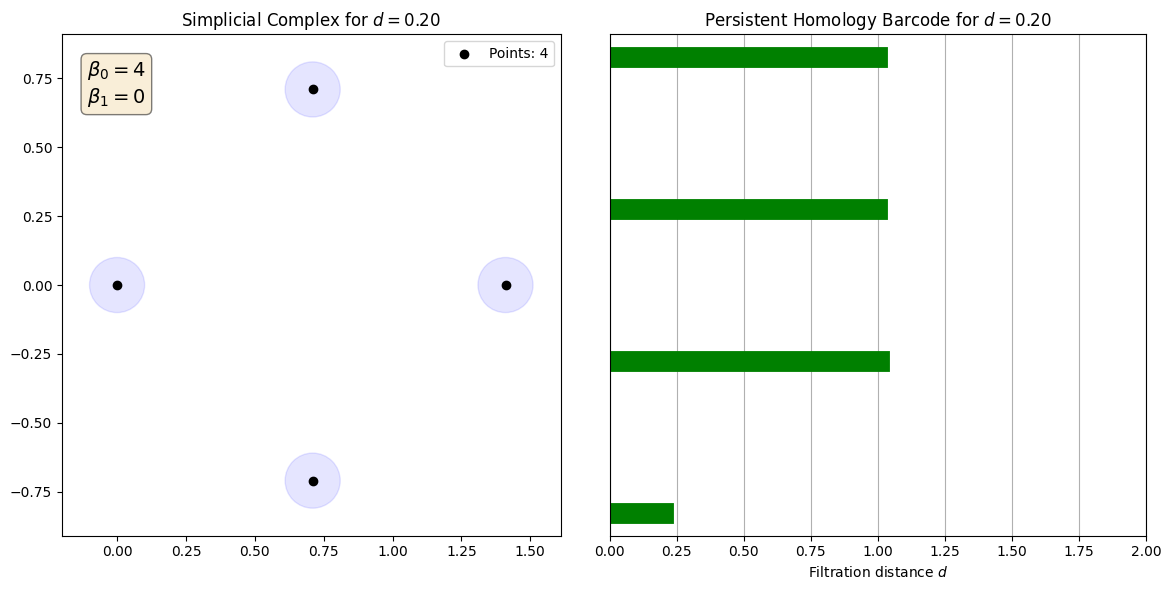

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd

# Define the points
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Create the Rips complex from the points
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Create the filtered simplicial complex
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistent homology
diag = simplex_tree.persistence()

# Separate X and Y coordinates
x_coords, y_coords = zip(*points)

# Define the filtration value (distance)
d =0.2  # Change this value according to the filtration level you want to visualize
radius = d / 2  # Radius of the balls around the points

# Get 0-simplices (points), 1-simplices (edges), and 2-simplices (triangles)
# Points
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= d]

# Edges
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= d]

# Triangles
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= d]

# Create figure with two subplots: one for the simplicial complex and one for the barcode
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the circles (balls) around each point
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radius, color='b', alpha=0.1)
    ax1.add_patch(circle)

# Plot the points
ax1.scatter(x_coords, y_coords, c='black', marker='o', label=f'Points: {len(vertices)}')

# Plot the edges (1-simplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label=f'Edges: {len(edges)}' if edge == edges[0] else "")

# Plot the triangles (2-simplices)
if triangles:
    triangles = np.array(triangles)
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    cmap = plt.get_cmap('viridis')
    color_values = np.array(x_coords)
    collec = ax1.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label=f'Triangles: {len(triangles)}')

# Calculate the Betti numbers for the current filtration level
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))

# Display Betti numbers on the plot
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
         verticalalignment='top', bbox=props)

# Add legend with number of points, edges, and triangles
ax1.legend()

# Title for the simplicial complex
ax1.set_title(f"Simplicial Complex for $d={d:.2f}$")

# Adjust plot limits to fully display the balls
ax1.set_xlim(min(x_coords) - d, max(x_coords) + d)
ax1.set_ylim(min(y_coords) - d, max(y_coords) + d)
ax1.set_aspect('equal', adjustable='box')

# Second subplot: Barcode plot for Betti numbers

# Filter the bars related to the current filtration
bars_betti_0 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else d) for i in diag if i[0] == 0 and i[1][0] <= d]
bars_betti_1 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else d) for i in diag if i[0] == 1 and i[1][0] <= d]

# Plot the blue bars for Betti 1 (1-holes) at the bottom with thicker lines
for i, (birth, death) in enumerate(bars_betti_1):
    ax2.plot([birth, death], [i, i], color='blue', lw=15)

# Plot the green bars for Betti 0 (connected components) above with thicker lines
offset = len(bars_betti_1)
for i, (birth, death) in enumerate(bars_betti_0):
    ax2.plot([birth, death], [i + offset, i + offset], color='green', lw=15)

# Add title and labels to the barcode plot
ax2.set_title(f"Persistent Homology Barcode for $d={d:.2f}$")
ax2.set_xlabel("Filtration distance $d$")
ax2.set_yticks([])
ax2.set_xlim(0, 2)  # Adjust the x-axis limits according to the maximum filtration value
ax2.grid(True)

# Display both plots together
plt.tight_layout()
plt.show()



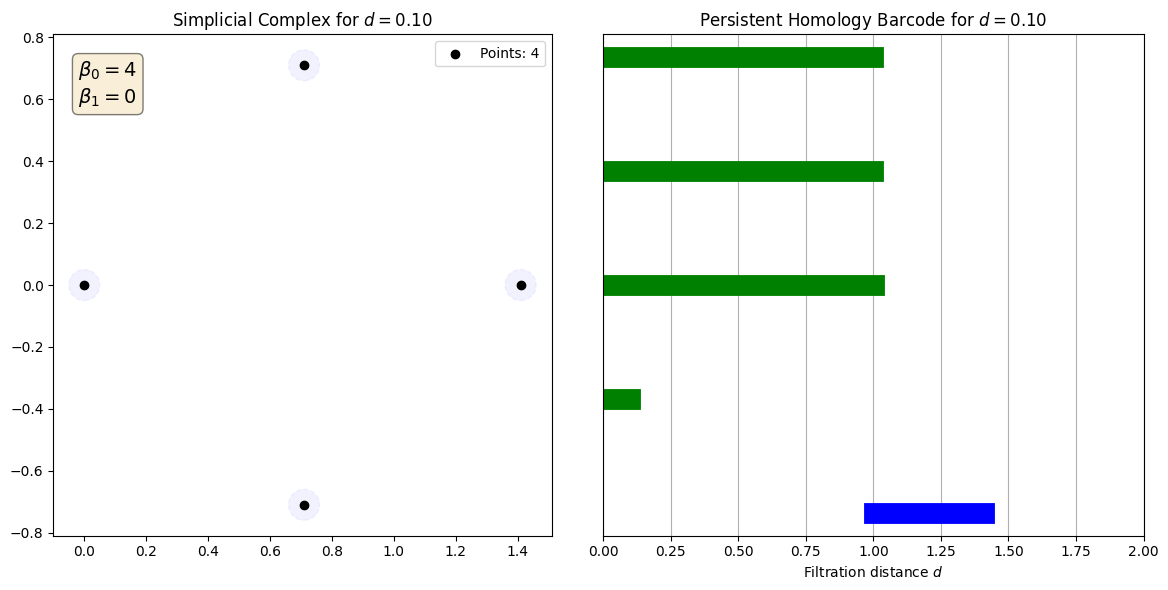

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd

# Define the points
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Create the Rips complex from the points
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Create the filtered simplicial complex
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistent homology
diag = simplex_tree.persistence()

# Separate X and Y coordinates
x_coords, y_coords = zip(*points)

# Define the filtration value (distance)
d = 0.1  # Change this value according to the filtration level you want to visualize
radius = d / 2  # Radius of the balls around the points

# Get 0-simplices (points), 1-simplices (edges), and 2-simplices (triangles)
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= d]

# Edges
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= d]

# Triangles
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= d]

# Create figure with two subplots: one for the simplicial complex and one for the barcode
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the circles (balls) around each point
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radius, color='b', alpha=0.05, linestyle='--')
    ax1.add_patch(circle)

# Plot the points
ax1.scatter(x_coords, y_coords, c='black', marker='o', label=f'Points: {len(vertices)}')

# Plot the edges (1-simplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label=f'Edges: {len(edges)}' if edge == edges[0] else "")

# Plot the triangles (2-simplices)
if triangles:
    triangles = np.array(triangles)
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    cmap = plt.get_cmap('viridis')
    color_values = np.array(x_coords)
    collec = ax1.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label=f'Triangles: {len(triangles)}')

# Calculate the Betti numbers for the current filtration level
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))

# Display Betti numbers on the plot
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
         verticalalignment='top', bbox=props)

# Add legend with number of points, edges, and triangles
ax1.legend()

# Title for the simplicial complex
ax1.set_title(f"Simplicial Complex for $d={d:.2f}$")

# Adjust plot limits to fully display the balls
ax1.set_xlim(min(x_coords) - d, max(x_coords) + d)
ax1.set_ylim(min(y_coords) - d, max(y_coords) + d)
ax1.set_aspect('equal', adjustable='box')

# Second subplot: Barcode plot for Betti numbers

# Correct filtering of the bars to include all relevant components
bars_betti_0 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else d) for i in diag if i[0] == 0]
bars_betti_1 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else d) for i in diag if i[0] == 1]

# Plot the blue bars for Betti 1 (1-holes) at the bottom with thicker lines
for i, (birth, death) in enumerate(bars_betti_1):
    ax2.plot([birth, death], [i, i], color='blue', lw=15)

# Plot the green bars for Betti 0 (connected components) above with thicker lines
offset = len(bars_betti_1)
for i, (birth, death) in enumerate(bars_betti_0):
    ax2.plot([birth, death], [i + offset, i + offset], color='green', lw=15)

# Add title and labels to the barcode plot
ax2.set_title(f"Persistent Homology Barcode for $d={d:.2f}$")
ax2.set_xlabel("Filtration distance $d$")
ax2.set_yticks([])
ax2.set_xlim(0, 2)  # Adjust the x-axis limits according to the maximum filtration value
ax2.grid(True)

# Display both plots together
plt.tight_layout()
plt.show()


In [ ]:
#ULTIMA

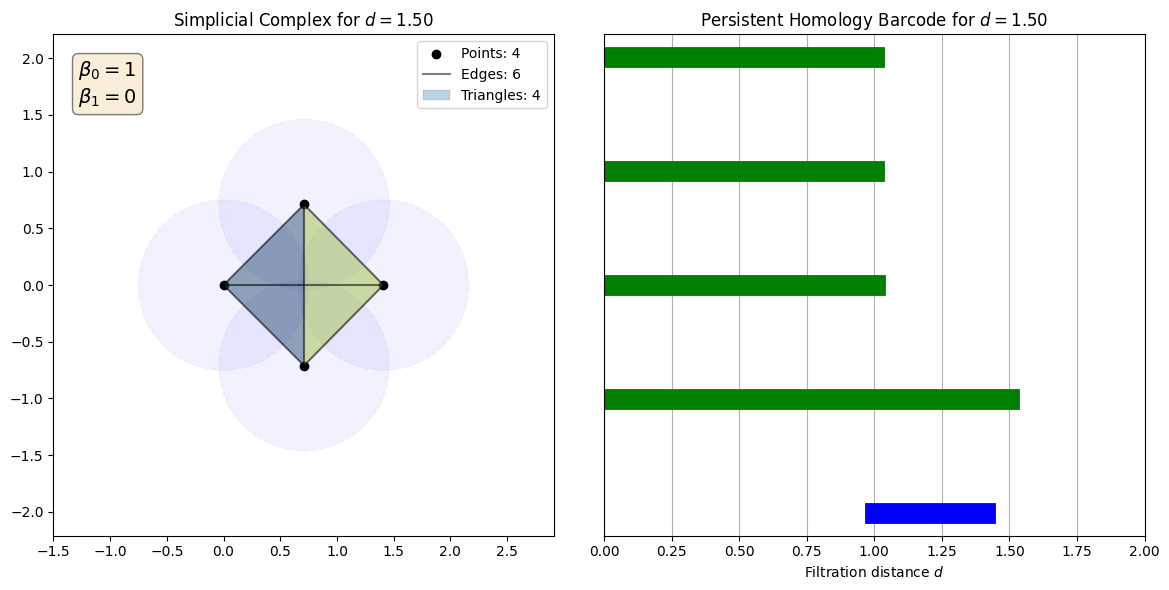

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd

# Define the points
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Create the Rips complex from the points
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Create the filtered simplicial complex
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistent homology
diag = simplex_tree.persistence()

# Separate X and Y coordinates
x_coords, y_coords = zip(*points)

# Define the filtration value (distance)
d = 1.5  # Change this value according to the filtration level you want to visualize
radius = d / 2  # Radius of the balls around the points

# Get 0-simplices (points), 1-simplices (edges), and 2-simplices (triangles)
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= d]

# Edges
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= d]

# Triangles
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= d]

# Create figure with two subplots: one for the simplicial complex and one for the barcode
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the circles (balls) around each point
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radius, color='b', alpha=0.05, linestyle='--')
    ax1.add_patch(circle)

# Plot the points
ax1.scatter(x_coords, y_coords, c='black', marker='o', label=f'Points: {len(vertices)}')

# Plot the edges (1-simplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label=f'Edges: {len(edges)}' if edge == edges[0] else "")

# Plot the triangles (2-simplices)
if triangles:
    triangles = np.array(triangles)
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    cmap = plt.get_cmap('viridis')
    color_values = np.array(x_coords)
    collec = ax1.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label=f'Triangles: {len(triangles)}')

# Calculate the Betti numbers for the current filtration level
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))

# Display Betti numbers on the plot
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
         verticalalignment='top', bbox=props)

# Add legend with number of points, edges, and triangles
ax1.legend()

# Title for the simplicial complex
ax1.set_title(f"Simplicial Complex for $d={d:.2f}$")

# Adjust plot limits to fully display the balls
ax1.set_xlim(min(x_coords) - d, max(x_coords) + d)
ax1.set_ylim(min(y_coords) - d, max(y_coords) + d)
ax1.set_aspect('equal', adjustable='box')

# Second subplot: Barcode plot for Betti numbers

# Filter the bars to only include components that are alive at filtration level d
bars_betti_0 = [(i[1][0], min(i[1][1], d)) for i in diag if i[0] == 0 and i[1][0] <= d]
bars_betti_1 = [(i[1][0], min(i[1][1], d)) for i in diag if i[0] == 1 and i[1][0] <= d]

# Plot the blue bars for Betti 1 (1-holes) at the bottom with thicker lines
for i, (birth, death) in enumerate(bars_betti_1):
    if birth <= d:  # Ensure birth happens before or at d
        ax2.plot([birth, death], [i, i], color='blue', lw=15)

# Plot the green bars for Betti 0 (connected components) above with thicker lines
offset = len(bars_betti_1)
for i, (birth, death) in enumerate(bars_betti_0):
    if birth <= d:  # Ensure birth happens before or at d
        ax2.plot([birth, death], [i + offset, i + offset], color='green', lw=15)

# Add title and labels to the barcode plot
ax2.set_title(f"Persistent Homology Barcode for $d={d:.2f}$")
ax2.set_xlabel("Filtration distance $d$")
ax2.set_yticks([])
ax2.set_xlim(0, 2)  # Adjust the x-axis limits according to the maximum filtration value
ax2.grid(True)

# Display both plots together
plt.tight_layout()
plt.show()


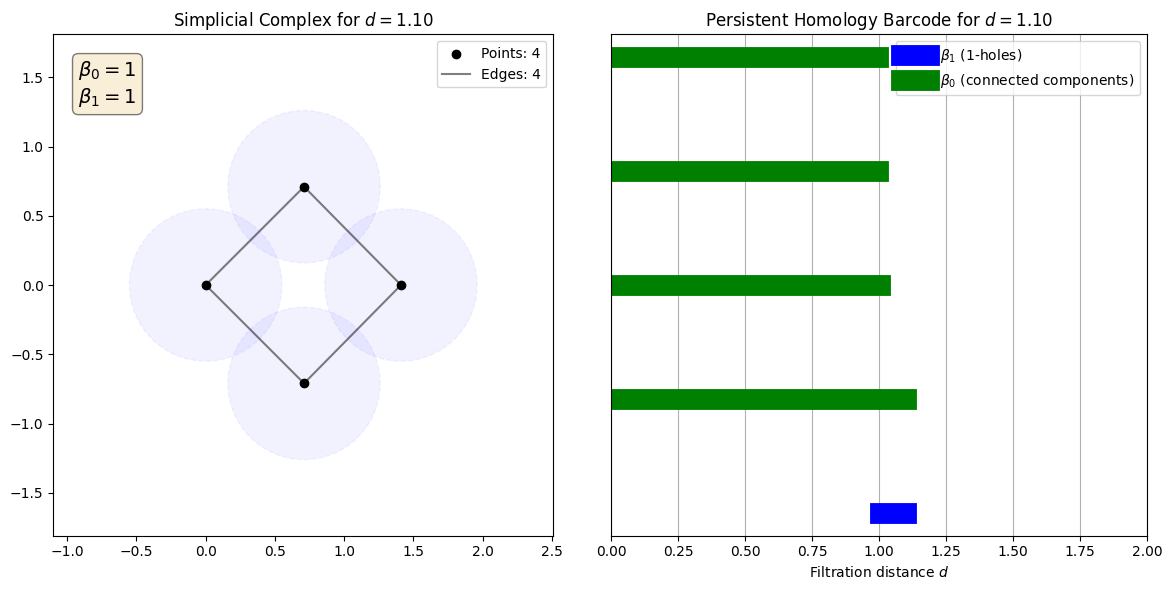

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd

# Define the points
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Create the Rips complex from the points
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Create the filtered simplicial complex
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistent homology
diag = simplex_tree.persistence()

# Separate X and Y coordinates
x_coords, y_coords = zip(*points)

# Define the filtration value (distance)
d = 1.1  # Change this value according to the filtration level you want to visualize
radius = d / 2  # Radius of the balls around the points

# Get 0-simplices (points), 1-simplices (edges), and 2-simplices (triangles)
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= d]

# Edges
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= d]

# Triangles
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= d]

# Create figure with two subplots: one for the simplicial complex and one for the barcode
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the circles (balls) around each point
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radius, color='b', alpha=0.05, linestyle='--')
    ax1.add_patch(circle)

# Plot the points
ax1.scatter(x_coords, y_coords, c='black', marker='o', label=f'Points: {len(vertices)}')

# Plot the edges (1-simplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label=f'Edges: {len(edges)}' if edge == edges[0] else "")

# Plot the triangles (2-simplices)
if triangles:
    triangles = np.array(triangles)
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    cmap = plt.get_cmap('viridis')
    color_values = np.array(x_coords)
    collec = ax1.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label=f'Triangles: {len(triangles)}')

# Calculate the Betti numbers for the current filtration level
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))

# Display Betti numbers on the plot
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
         verticalalignment='top', bbox=props)

# Add legend with number of points, edges, and triangles
ax1.legend()

# Title for the simplicial complex
ax1.set_title(f"Simplicial Complex for $d={d:.2f}$")

# Adjust plot limits to fully display the balls
ax1.set_xlim(min(x_coords) - d, max(x_coords) + d)
ax1.set_ylim(min(y_coords) - d, max(y_coords) + d)
ax1.set_aspect('equal', adjustable='box')

# Second subplot: Barcode plot for Betti numbers

# Filter the bars to only include components that are alive at filtration level d
bars_betti_0 = [(i[1][0], min(i[1][1], d)) for i in diag if i[0] == 0 and i[1][0] <= d]
bars_betti_1 = [(i[1][0], min(i[1][1], d)) for i in diag if i[0] == 1 and i[1][0] <= d]

# Plot the blue bars for Betti 1 (1-holes) at the bottom with thicker lines
for i, (birth, death) in enumerate(bars_betti_1):
    if birth <= d:  # Ensure birth happens before or at d
        ax2.plot([birth, death], [i, i], color='blue', lw=15, label='$\\beta_1$ (1-holes)' if i == 0 else "")

# Plot the green bars for Betti 0 (connected components) above with thicker lines
offset = len(bars_betti_1)
for i, (birth, death) in enumerate(bars_betti_0):
    if birth <= d:  # Ensure birth happens before or at d
        ax2.plot([birth, death], [i + offset, i + offset], color='green', lw=15, label='$\\beta_0$ (connected components)' if i == 0 else "")

# Add title and labels to the barcode plot
ax2.set_title(f"Persistent Homology Barcode for $d={d:.2f}$")
ax2.set_xlabel("Filtration distance $d$")
ax2.set_yticks([])
ax2.set_xlim(0, 2)  # Adjust the x-axis limits according to the maximum filtration value
ax2.grid(True)

# Add legends to the barcode plot
ax2.legend()

# Display both plots together
plt.tight_layout()
plt.show()


In [ ]:
#ultiam
    

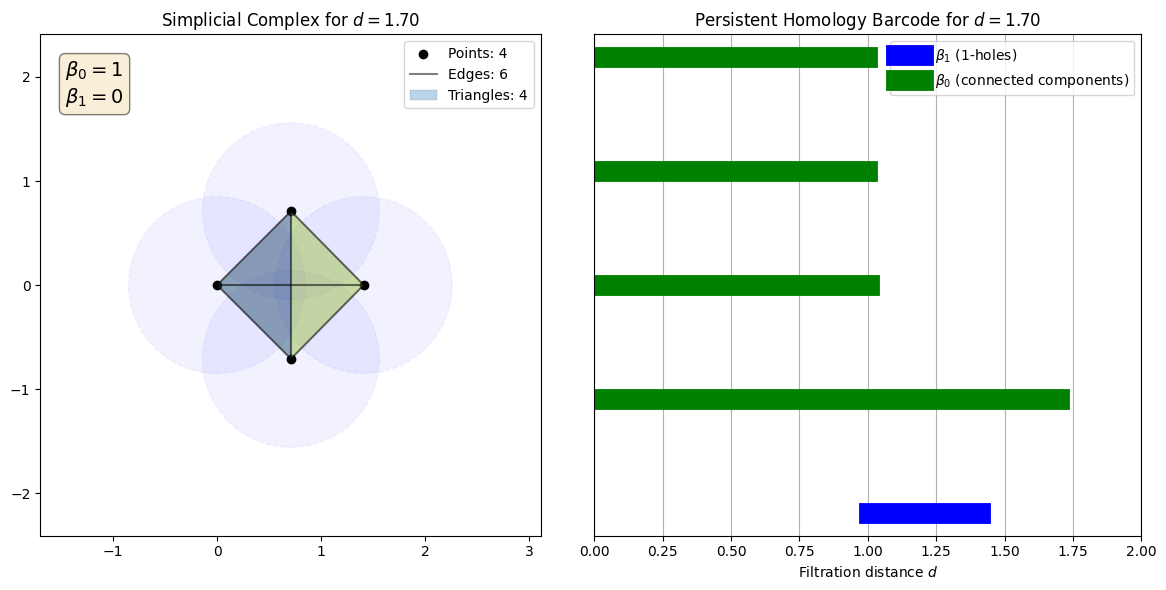

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd

# Define the points
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Create the Rips complex from the points
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Create the filtered simplicial complex
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistent homology
diag = simplex_tree.persistence()

# Separate X and Y coordinates
x_coords, y_coords = zip(*points)

# Define the filtration value (distance)
d = 1.7 # Change this value according to the filtration level you want to visualize
radius = d / 2  # Radius of the balls around the points

# Get 0-simplices (points), 1-simplices (edges), and 2-simplices (triangles)
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= d]

# Edges
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= d]

# Triangles
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= d]

# Create figure with two subplots: one for the simplicial complex and one for the barcode
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the circles (balls) around each point
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radius, color='b', alpha=0.05, linestyle='--')
    ax1.add_patch(circle)

# Plot the points
ax1.scatter(x_coords, y_coords, c='black', marker='o', label=f'Points: {len(vertices)}')

# Plot the edges (1-simplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label=f'Edges: {len(edges)}' if edge == edges[0] else "")

# Plot the triangles (2-simplices)
if triangles:
    triangles = np.array(triangles)
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    cmap = plt.get_cmap('viridis')
    color_values = np.array(x_coords)
    collec = ax1.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label=f'Triangles: {len(triangles)}')

# Calculate the Betti numbers for the current filtration level
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))

# Display Betti numbers on the plot
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
         verticalalignment='top', bbox=props)

# Add legend with number of points, edges, and triangles
ax1.legend()

# Title for the simplicial complex
ax1.set_title(f"Simplicial Complex for $d={d:.2f}$")

# Adjust plot limits to fully display the balls
ax1.set_xlim(min(x_coords) - d, max(x_coords) + d)
ax1.set_ylim(min(y_coords) - d, max(y_coords) + d)
ax1.set_aspect('equal', adjustable='box')

# Second subplot: Barcode plot for Betti numbers

# Filter the bars to only include components that are alive at filtration level d
bars_betti_0 = [(i[1][0], min(i[1][1], d)) for i in diag if i[0] == 0 and i[1][0] <= d]
bars_betti_1 = [(i[1][0], min(i[1][1], d)) for i in diag if i[0] == 1 and i[1][0] <= d]

# Plot the blue bars for Betti 1 (1-holes) at the bottom with thicker lines
for i, (birth, death) in enumerate(bars_betti_1):
    if birth <= d:  # Ensure birth happens before or at d
        ax2.plot([birth, death], [i, i], color='blue', lw=15, label=r"$\beta_1$ (1-holes)" if i == 0 else "")

# Plot the green bars for Betti 0 (connected components) above with thicker lines
offset = len(bars_betti_1)
for i, (birth, death) in enumerate(bars_betti_0):
    if birth <= d:  # Ensure birth happens before or at d
        ax2.plot([birth, death], [i + offset, i + offset], color='green', lw=15, label=r"$\beta_0$ (connected components)" if i == 0 else "")

# Add title and labels to the barcode plot
ax2.set_title(f"Persistent Homology Barcode for $d={d:.2f}$")
ax2.set_xlabel("Filtration distance $d$")
ax2.set_yticks([])
ax2.set_xlim(0, 2)  # Adjust the x-axis limits according to the maximum filtration value
ax2.grid(True)

# Add legends to the barcode plot
ax2.legend()

# Display both plots together
plt.tight_layout()
plt.savefig()
plt.show()


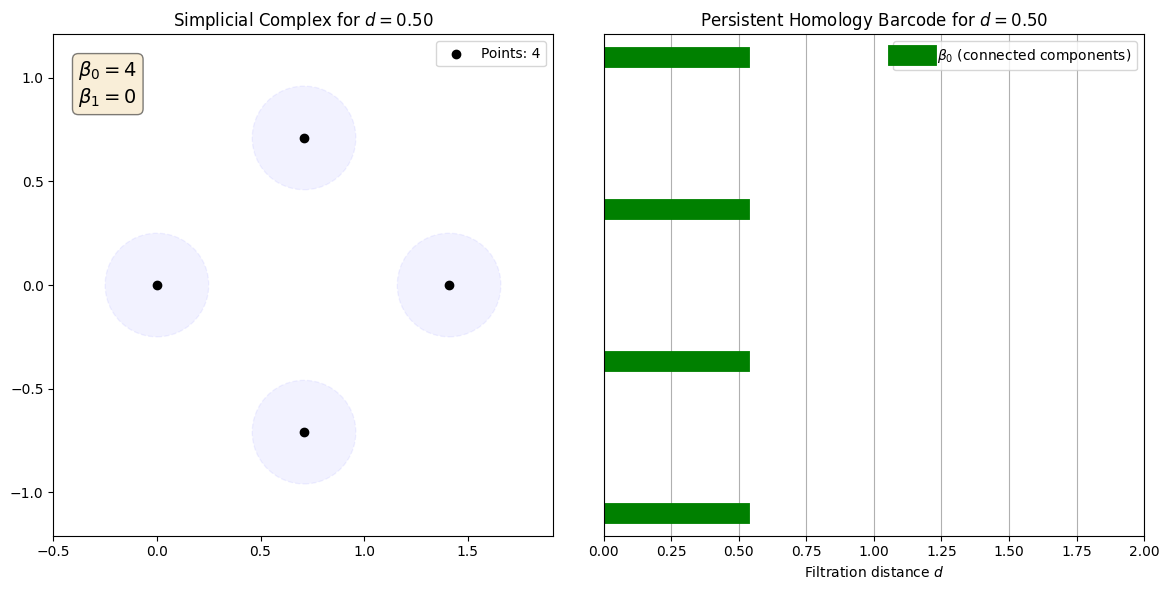

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd

# Define the points
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Create the Rips complex from the points
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Create the filtered simplicial complex
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistent homology
diag = simplex_tree.persistence()

# Separate X and Y coordinates
x_coords, y_coords = zip(*points)

# Define the filtration value (distance)
d = 0.5  # Change this value according to the filtration level you want to visualize
radius = d / 2  # Radius of the balls around the points

# Get 0-simplices (points), 1-simplices (edges), and 2-simplices (triangles)
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= d]

# Edges
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= d]

# Triangles
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= d]

# Create figure with two subplots: one for the simplicial complex and one for the barcode
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the circles (balls) around each point
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radius, color='b', alpha=0.05, linestyle='--')
    ax1.add_patch(circle)

# Plot the points
ax1.scatter(x_coords, y_coords, c='black', marker='o', label=f'Points: {len(vertices)}')

# Plot the edges (1-simplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label=f'Edges: {len(edges)}' if edge == edges[0] else "")

# Plot the triangles (2-simplices)
if triangles:
    triangles = np.array(triangles)
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    cmap = plt.get_cmap('viridis')
    color_values = np.array(x_coords)
    collec = ax1.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label=f'Triangles: {len(triangles)}')

# Calculate the Betti numbers for the current filtration level
betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))
betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))

# Display Betti numbers on the plot
textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
         verticalalignment='top', bbox=props)

# Add legend with number of points, edges, and triangles
ax1.legend()

# Title for the simplicial complex
ax1.set_title(f"Simplicial Complex for $d={d:.2f}$")

# Adjust plot limits to fully display the balls
ax1.set_xlim(min(x_coords) - d, max(x_coords) + d)
ax1.set_ylim(min(y_coords) - d, max(y_coords) + d)
ax1.set_aspect('equal', adjustable='box')

# Second subplot: Barcode plot for Betti numbers

# Filter the bars to only include components that are alive at filtration level d
bars_betti_0 = [(i[1][0], min(i[1][1], d)) for i in diag if i[0] == 0 and i[1][0] <= d]
bars_betti_1 = [(i[1][0], min(i[1][1], d)) for i in diag if i[0] == 1 and i[1][0] <= d]

# Plot the blue bars for Betti 1 (1-holes) at the bottom with thicker lines
for i, (birth, death) in enumerate(bars_betti_1):
    if birth <= d:  # Ensure birth happens before or at d
        ax2.plot([birth, death], [i, i], color='blue', lw=15, label=r"$\beta_1$ (1-holes)" if i == 0 else "")

# Plot the green bars for Betti 0 (connected components) above with thicker lines
offset = len(bars_betti_1)
for i, (birth, death) in enumerate(bars_betti_0):
    if birth <= d:  # Ensure birth happens before or at d
        ax2.plot([birth, death], [i + offset, i + offset], color='green', lw=15, label=r"$\beta_0$ (connected components)" if i == 0 else "")

# Add title and labels to the barcode plot
ax2.set_title(f"Persistent Homology Barcode for $d={d:.2f}$")
ax2.set_xlabel("Filtration distance $d$")
ax2.set_yticks([])
ax2.set_xlim(0, 2)  # Adjust the x-axis limits according to the maximum filtration value
ax2.grid(True)

# Add legends to the barcode plot
ax2.legend()

# Save the figure with a dynamic filename based on the value of d
plt.tight_layout()
plt.savefig(f"plots/example1_d{d:.2f}.svg", dpi=600)

# Display both plots together
plt.show()


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd
from ipywidgets import interact, FloatSlider

# Define the points
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Create the Rips complex from the points
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Create the filtered simplicial complex
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistent homology
diag = simplex_tree.persistence()

# Separate X and Y coordinates
x_coords, y_coords = zip(*points)

# Function to update the plots dynamically
def update_plots(d):
    radius = d / 2  # Radius of the balls around the points

    # Get 0-simplices (points), 1-simplices (edges), and 2-simplices (triangles)
    # Points
    vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= d]

    # Edges
    edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= d]

    # Triangles
    triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= d]

    # Create figure with two subplots: one for the simplicial complex and one for the barcode
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the circles (balls) around each point
    for (x, y) in zip(x_coords, y_coords):
        circle = plt.Circle((x, y), radius=radius, color='b', alpha=0.09)
        ax1.add_patch(circle)

    # Plot the points
    ax1.scatter(x_coords, y_coords, c='black', marker='o', label=f'Points: {len(vertices)}')

    # Plot the edges (1-simplices)
    for edge in edges:
        x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
        y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
        ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label=f'Edges: {len(edges)}' if edge == edges[0] else "")

    # Plot the triangles (2-simplices)
    if triangles:
        triangles = np.array(triangles)
        triang = mtri.Triangulation(x_coords, y_coords, triangles)
        cmap = plt.get_cmap('viridis')
        color_values = np.array(x_coords)
        collec = ax1.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label=f'Triangles: {len(triangles)}')

    # Calculate the Betti numbers for the current filtration level
    betti_0 = sum(1 for i in diag if i[0] == 0 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))
    betti_1 = sum(1 for i in diag if i[0] == 1 and i[1][0] <= d and (i[1][1] > d or i[1][1] == float('inf')))

    # Display Betti numbers on the plot
    textstr = f"$\\beta_0 = {betti_0}$\n$\\beta_1 = {betti_1}$"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
             verticalalignment='top', bbox=props)

    # Add legend with number of points, edges, and triangles
    ax1.legend()

    # Title for the simplicial complex
    ax1.set_title(f"Simplicial Complex for $d={d:.2f}$")

    # Adjust plot limits to fully display the balls
    ax1.set_xlim(min(x_coords) - d, max(x_coords) + d)
    ax1.set_ylim(min(y_coords) - d, max(y_coords) + d)
    ax1.set_aspect('equal', adjustable='box')

    # Second subplot: Barcode plot for Betti numbers

    # Filter the bars related to the current filtration
    bars_betti_0 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else d) for i in diag if i[0] == 0 and i[1][0] <= d]
    bars_betti_1 = [(i[1][0], i[1][1] if i[1][1] != float('inf') else d) for i in diag if i[0] == 1 and i[1][0] <= d]

    # Plot the blue bars for Betti 1 (1-holes) at the bottom with thicker lines
    for i, (birth, death) in enumerate(bars_betti_1):
        ax2.plot([birth, death], [i, i], color='blue', lw=15)

    # Plot the green bars for Betti 0 (connected components) above with thicker lines
    offset = len(bars_betti_1)
    for i, (birth, death) in enumerate(bars_betti_0):
        ax2.plot([birth, death], [i + offset, i + offset], color='green', lw=15)

    # Add title and labels to the barcode plot
    ax2.set_title(f"Persistent Homology Barcode for $d={d:.2f}$")
    ax2.set_xlabel("Filtration distance $d$")
    ax2.set_yticks([])
    ax2.set_xlim(0, 2)  # Adjust the x-axis limits according to the maximum filtration value
    ax2.grid(True)

    # Display both plots together
    plt.tight_layout()
    plt.show()

# Create a slider for the filtration distance
slider = FloatSlider(value=0.5, min=0.1, max=2.0, step=0.05, description='Filtration $d$')

# Use ipywidgets' interact function to make the plot interactive
interact(update_plots, d=slider)


interactive(children=(FloatSlider(value=0.5, description='Filtration $d$', max=2.0, min=0.1, step=0.05), Outpu…

<function __main__.update_plots(d)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from gudhi import RipsComplex

# Definir puntos
#points = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2], [-0.5, np.sqrt(3)/2]])
points =np.array([(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)])
# Función para dibujar el complejo simplicial sin usar networkx
def draw_simplicial_complex(points, filtrations, filtration_time):
    plt.figure(figsize=(6, 6))
    
    # Dibujar los puntos
    for point in points:
        plt.scatter(point[0], point[1], color='black', zorder=5)
    
    # Dibujar bolas alrededor de los puntos dependiendo de la filtración
    for point in points:
        circle = plt.Circle(point, filtration_time, color='blue', fill=False, linestyle='--', alpha=0.3)
        plt.gca().add_artist(circle)
    
    # Calcular la distancia entre los puntos para agregar las aristas del complejo
    distances = distance_matrix(points, points)
    
    # Dibujar aristas basadas en el radio de filtración
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            if distances[i, j] <= 2 * filtration_time:
                plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'g-', zorder=1)
    
    # Dibujar triángulos si corresponde (2-simplejos)
    for simplex in filtrations:
        if len(simplex[0]) == 3 and simplex[1] <= filtration_time:
            triangle = points[simplex[0]]
            plt.fill(triangle[:, 0], triangle[:, 1], 'cyan', alpha=0.9)
    
    plt.xlim(-1, 2.5)
    plt.ylim(-1.71, 1.71)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"Filtración en tiempo: {filtration_time}")
    plt.show()

# Crear el complejo de Rips
rips_complex = RipsComplex(points=points, max_edge_length=2.5)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Extraer filtración (simplejos y sus tiempos)
filtrations = simplex_tree.get_filtration()

# Dibujar el complejo simplicial en diferentes tiempos de la filtración
for filtration_time in [0, 0.4, 0.8]:
    draw_simplicial_complex(points, filtrations, filtration_time)


In [ ]:
    for simplex in filtrations:
        if len(simplex[0]) == 3 and simplex[1] <= filtration_time:
            triangle = points[simplex[0]]
            plt.fill(triangle[:, 0], triangle[:, 1], 'cyan', alpha=0.9)

In [ ]:
simplex_tree.get_filtration()

In [ ]:
# Explorar los símplices y sus filtraciones
for simplex, filtration in simplex_tree.get_filtration():
    print(f"Símplice: {simplex}, Filtración: {filtration}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from gudhi import RipsComplex

# Definir puntos
points =np.array([(0, 0.5), (0.5, 1), (1, 0.5), (0.5, 0)])

# Función para dibujar el complejo simplicial sin usar networkx
def draw_simplicial_complex(points, filtrations, filtration_time):
    plt.figure(figsize=(6, 6))
    
    # Dibujar los puntos
    for point in points:
        plt.scatter(point[0], point[1], color='black', zorder=5)
    
    # Dibujar bolas alrededor de los puntos dependiendo de la filtración
    for point in points:
        circle = plt.Circle(point, filtration_time, color='blue', fill=False, linestyle='--', alpha=0.5)
        plt.gca().add_artist(circle)
    
    # Calcular la distancia entre los puntos para agregar las aristas del complejo
    distances = distance_matrix(points, points)
    
    # Dibujar aristas basadas en el radio de filtración
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            if distances[i, j] <= 2 * filtration_time:
                plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'r-', zorder=1)
    
    # Dibujar triángulos si corresponde (2-simplejos)
    triangles=[]
    for simplex in filtrations:
        if len(simplex[0]) == 3 and simplex[1] <= filtration_time:
            #triangles.append(simplex[0])
            triangle = np.array([points[simplex[0][0]], points[simplex[0][1]], points[simplex[0][2]]])
            plt.fill(triangle[:, 0], triangle[:, 1], 'g', alpha=0.9)  # Corregido el uso de 'alpha'
            triangles.append(triangle)
    plt.fill(triangles[0][:, 0], triangles[0][:, 1], 'g', alpha=0.9)  # Corregido el uso de 'alpha'
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"Filtración en tiempo: {filtration_time}")
    plt.show()
    

# Crear el complejo de Rips
rips_complex = RipsComplex(points=points, max_edge_length=2.5)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Extraer filtración (simplejos y sus tiempos)
filtrations = simplex_tree.get_filtration()

# Dibujar el complejo simplicial en diferentes tiempos de la filtración
for filtration_time in [0, 0.5, 0.7, 1.0]:
    draw_simplicial_complex(points, filtrations, filtration_time)


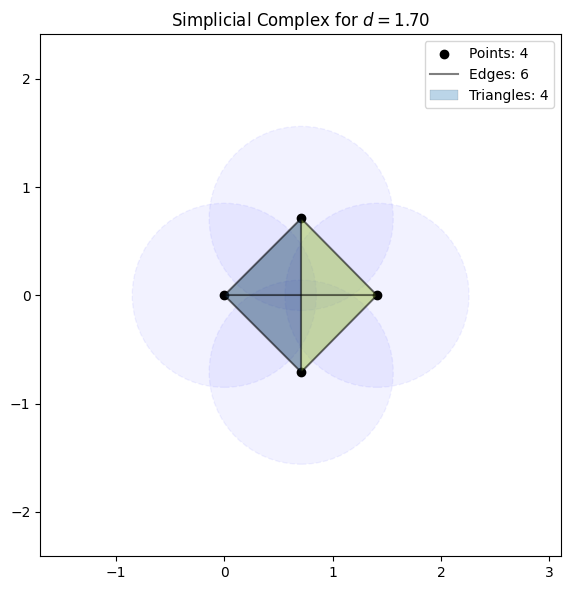

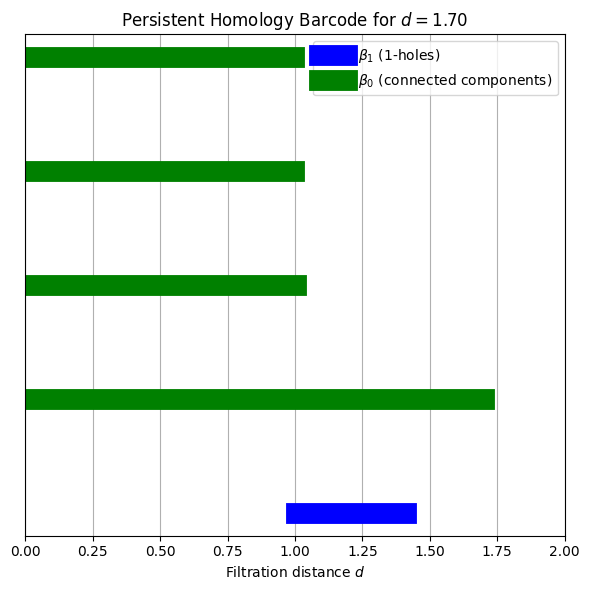

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import gudhi as gd

# Define the points
points = [(0, 0), (0.71, -0.71), (0.71, 0.71), (1.41, 0.00)]

# Create the Rips complex from the points
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)

# Create the filtered simplicial complex
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistent homology
diag = simplex_tree.persistence()

# Separate X and Y coordinates
x_coords, y_coords = zip(*points)

# Define the filtration value (distance)
d = 1.7  # Change this value according to the filtration level you want to visualize
radius = d / 2  # Radius of the balls around the points

# Get 0-simplices (points), 1-simplices (edges), and 2-simplices (triangles)
vertices = [s[0] for s in simplex_tree.get_skeleton(0) if s[1] <= d]

# Edges
edges = [s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2 and s[1] <= d]

# Triangles
triangles = [s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= d]

# First figure: Simplicial Complex
fig1, ax1 = plt.subplots(figsize=(6, 6))

# Plot the circles (balls) around each point
for (x, y) in zip(x_coords, y_coords):
    circle = plt.Circle((x, y), radius=radius, color='b', alpha=0.05, linestyle='--')
    ax1.add_patch(circle)

# Plot the points
ax1.scatter(x_coords, y_coords, c='black', marker='o', label=f'Points: {len(vertices)}')

# Plot the edges (1-simplices)
for edge in edges:
    x_edge = [x_coords[edge[0]], x_coords[edge[1]]]
    y_edge = [y_coords[edge[0]], y_coords[edge[1]]]
    ax1.plot(x_edge, y_edge, 'k-', alpha=0.5, label=f'Edges: {len(edges)}' if edge == edges[0] else "")

# Plot the triangles (2-simplices)
if triangles:
    triangles = np.array(triangles)
    triang = mtri.Triangulation(x_coords, y_coords, triangles)
    cmap = plt.get_cmap('viridis')
    color_values = np.array(x_coords)
    ax1.tripcolor(triang, color_values, cmap=cmap, edgecolors='k', alpha=0.3, label=f'Triangles: {len(triangles)}')

# Add legend and title
ax1.legend()
ax1.set_title(f"Simplicial Complex for $d={d:.2f}$")
ax1.set_xlim(min(x_coords) - d, max(x_coords) + d)
ax1.set_ylim(min(y_coords) - d, max(y_coords) + d)
ax1.set_aspect('equal', adjustable='box')

# Save the Simplicial Complex figure
plt.tight_layout()
plt.savefig(f"plots/simplicial_complex_d{d:.2f}.svg", dpi=600)

# Display the Simplicial Complex plot
plt.show()

# Second figure: Persistent Homology Barcode
fig2, ax2 = plt.subplots(figsize=(6, 6))

# Filter the bars to only include components that are alive at filtration level d
bars_betti_0 = [(i[1][0], min(i[1][1], d)) for i in diag if i[0] == 0 and i[1][0] <= d]
bars_betti_1 = [(i[1][0], min(i[1][1], d)) for i in diag if i[0] == 1 and i[1][0] <= d]

# Plot the blue bars for Betti 1 (1-holes) at the bottom with thicker lines
for i, (birth, death) in enumerate(bars_betti_1):
    if birth <= d:  # Ensure birth happens before or at d
        ax2.plot([birth, death], [i, i], color='blue', lw=15, label=r"$\beta_1$ (1-holes)" if i == 0 else "")

# Plot the green bars for Betti 0 (connected components) above with thicker lines
offset = len(bars_betti_1)
for i, (birth, death) in enumerate(bars_betti_0):
    if birth <= d:  # Ensure birth happens before or at d
        ax2.plot([birth, death], [i + offset, i + offset], color='green', lw=15, label=r"$\beta_0$ (connected components)" if i == 0 else "")

# Add title and labels to the barcode plot
ax2.set_title(f"Persistent Homology Barcode for $d={d:.2f}$")
ax2.set_xlabel("Filtration distance $d$")
ax2.set_yticks([])
ax2.set_xlim(0, 2)  # Adjust the x-axis limits according to the maximum filtration value
ax2.grid(True)

# Add legend to the barcode plot
ax2.legend()

# Save the Persistent Homology Barcode figure
plt.tight_layout()
plt.savefig(f"plots/barcode_d{d:.2f}.svg", dpi=600)

# Display the Persistent Homology Barcode plot
plt.show()


In [49]:
import matplotlib.pyplot as plt

def plot_persistence_barcode(persistence, max_filtration_value, save_path=None):
    """
    Plots the persistence barcode from the given persistence diagram.

    Parameters:
    - persistence: Output from simplex_tree.persistence(), a list of tuples where the first element is the homology
                   dimension (e.g., 0 for connected components, 1 for loops, etc.) and the second element is a tuple
                   representing (birth, death) of the feature.
    - max_filtration_value: The maximum filtration value to display on the x-axis.
    - save_path: If provided, saves the plot to the specified file path.

    Returns:
    - None
    """
    fig, ax = plt.subplots(figsize=(6, 6))

    # Filter the bars for Betti 0 (connected components) and Betti 1 (1-holes)
    bars_betti_0 = [(i[1][0], i[1][1]) for i in persistence if i[0] == 0]
    bars_betti_1 = [(i[1][0], i[1][1]) for i in persistence if i[0] == 1]

    # Plot the blue bars for Betti 1 (1-holes)
    for i, (birth, death) in enumerate(bars_betti_1):
        death = min(death, max_filtration_value)  # Cap death at max_filtration_value
        ax.plot([birth, death], [i, i], color='blue', lw=15, label=r"$\beta_1$ (1-holes)" if i == 0 else "")

    # Plot the green bars for Betti 0 (connected components)
    offset = len(bars_betti_1)
    for i, (birth, death) in enumerate(bars_betti_0):
        death = min(death, max_filtration_value)  # Cap death at max_filtration_value
        ax.plot([birth, death], [i + offset, i + offset], color='green', lw=15, label=r"$\beta_0$ (connected components)" if i == 0 else "")

    # Add title and labels
    ax.set_title(f"Persistent Homology Barcode")
    ax.set_xlabel("Filtration value")
    ax.set_yticks([])
    ax.set_xlim(0, max_filtration_value)  # Adjust x-axis to maximum filtration value
    ax.grid(True)

    # Add legend
    ax.legend()

    # Save the plot if save_path is provided
    if save_path:
        plt.tight_layout()
        plt.savefig(save_path, dpi=300)

    # Display the plot
    plt.show()

# Example usage:
# diag = simplex_tree.persistence()  # Assuming you have this from GUDHI
# plot_persistence_barcode(diag, max_filtration_value=2.0)


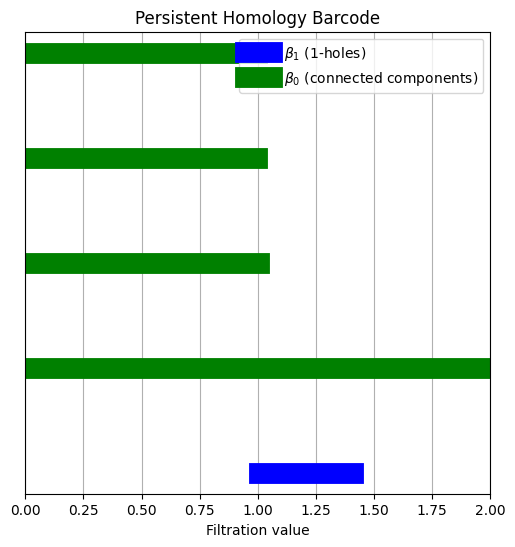

In [48]:
#Example usage:
diag = simplex_tree.persistence()  # Assuming you have this from GUDHI
plot_persistence_barcode(diag, max_filtration_value=2.0)